In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
venues = ['icml', 'neurips','iclr']
years = [2020, 2021, 2022, 2023, 2024]

ai4s_paper_count = {'icml': {2020: 1087, 2021: 1189, 2022:1237, 2023:1908, 2024:2640},
                    'neurips': {2020: 1909, 2021: 2342, 2022: 2911, 2023: 3584},
                    'iclr':{2020:695, 2021: 868, 2022: 1103, 2023: 1590,2024:2321} ,
                    'icml_ratio': dict.fromkeys(years),
                    'neurips_ratio': dict.fromkeys(years),
                    'iclr_ratio':dict.fromkeys(years)
                    }
keys = []
for i in venues:
    csvs = [os.path.join(f'../{i}',j) for j in os.listdir(f'../{i}')]
    keys.extend(csvs)
    data = np.array([[int(d.split('_')[-1].split('.')[0]),len(pd.read_csv(d,dtype=str))] for d in csvs]) 
    for j in range(data.shape[0]):
        ai4s_paper_count[i][data[j,0]] = [ai4s_paper_count[i][data[j,0]], data[j,1]] 
        ai4s_paper_count[f'{i}_ratio'][data[j,0]]=data[j,1]/data[j,0]
keys = np.array(keys)

ai4s_paper_count = pd.DataFrame(ai4s_paper_count)

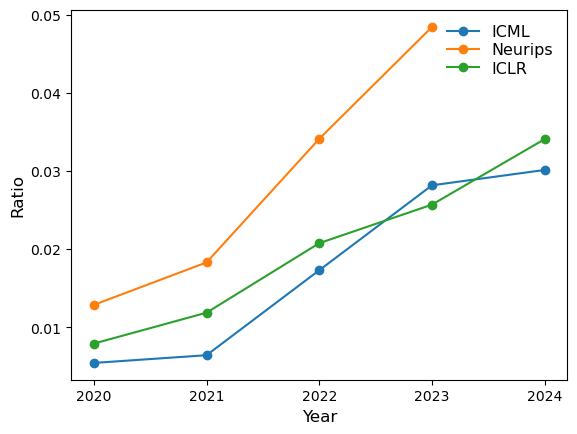

In [3]:
plt.plot(ai4s_paper_count.index, ai4s_paper_count['icml_ratio'], marker='o', label='ICML')
plt.plot(ai4s_paper_count.index, ai4s_paper_count['neurips_ratio'], marker='o', label='Neurips')
plt.plot(ai4s_paper_count.index, ai4s_paper_count['iclr_ratio'], marker='o', label='ICLR')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.xticks(years, years)
plt.legend(labelspacing = 0.2,frameon=False, fontsize=11.5)
plt.savefig('ai4s_paper_ratio.png', dpi=200, bbox_inches='tight')
plt.show()

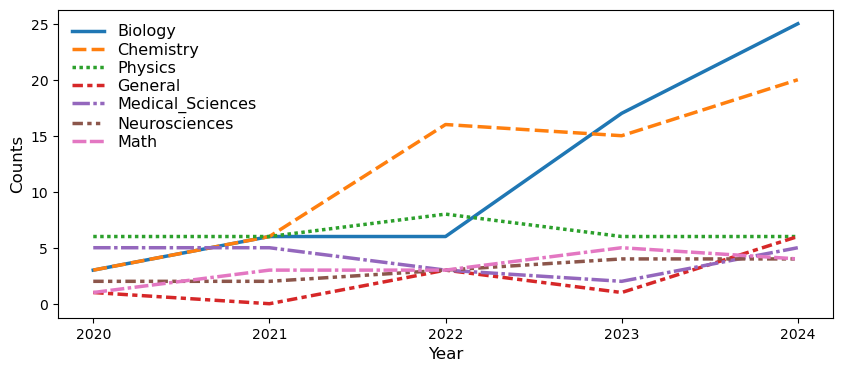

In [4]:
applications = {}
for i in years:
    csv_files = keys[[int(k.split('_')[-1].split('.')[0]) == i for k in keys]]
    for j in csv_files:
        data = pd.read_csv(j,dtype=str)
        appl, count = np.unique(np.array(data['Application']), return_counts=True)
        for k in range(len(appl)):
            if appl[k] not in applications.keys():
                applications[appl[k]] = np.zeros(len(years))
            applications[appl[k]][i-2020] = count[k]   
applications = pd.DataFrame(applications, index=years)
include_applications = applications[applications.columns[applications.sum() > 10]]
figure = plt.figure(figsize=(10, 4))
sns.lineplot(data=include_applications, palette="tab10", linewidth=2.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(years, years)
plt.legend(labelspacing = 0.2,frameon=False, fontsize=11.5)
plt.savefig('conference_application_year.png', dpi=200, bbox_inches='tight')
plt.show()